#### **Preprocess**

In [ ]:
from PreProcess import PreProcess
from CommentsModel import CommentsModel
from Training import Training
from Prediction import Prediction
import pandas as pd

cleaned_csv_path = "../cleaned/movie_comments_2024-12-21-32.csv"
movie_comments_df = pd.read_csv(cleaned_csv_path)

#Undersampling
# Function to balance sentiment distribution
def balance_sentiment(df):
    balanced_rows = []

    for movie, group in df.groupby('Movie Name'):
        # Separate sentiments
        positive = group[group['Sentiment'] == 'Positive']
        negative = group[group['Sentiment'] == 'Negative']
        neutral = group[group['Sentiment'] == 'Neutral']

        # If the positive and negative counts are different, undersample the larger one
        min_count = min(len(positive), len(negative))
        positive = positive.sample(min_count)
        negative = negative.sample(min_count)

        # Remove neutral if it is too large compared to the positive and negative counts
        if len(neutral) > max(len(positive), len(negative)):
            neutral = pd.DataFrame()  # Remove all neutral entries

        # Combine the undersampled positive and negative, and add the neutral if needed
        balanced_rows.append(pd.concat([positive, negative, neutral]))

    # Concatenate all the balanced movie data
    return pd.concat(balanced_rows)

# Apply the function
balanced_df = balance_sentiment(movie_comments_df)

# Show the resulting dataframe
display(balanced_df)

display(movie_comments_df)
# Instantiate the classes
metrics_folder = "metrics_folder"
preprocess = PreProcess()
model_class = CommentsModel(unique_name="V3_Model")
training_class = Training(model_class, metrics_folder)
prediction_class = Prediction(model_class, preprocess, metrics_folder)

# Build the model
model_class.build_model(vocab_size=10000, embedding_dim=300, lstm_units=128)
# Train the model
training_class.train(dataframe=movie_comments_df, preprocess=preprocess)
# Make predictions
#sentiment_count, outcomes = prediction_class.predict(youtube_url)


,Movie Name,Comment,Imdb Rating,Positive,Negative,Neutral,Compound,Sentiment,Score,Verdict
632,Gladiator,"The Fall of the Roman Empire 1964.. Watch it, ...",6.4,0.132,0.053,0.815,0.5994,Positive,8.448,Average
336,Gladiator,most new movies are thresh compared to the mas...,6.4,0.212,0.000,0.788,0.5423,Positive,13.568,Average
527,Gladiator,Hmmm what's next .... Gladiator V Alien! some ...,6.4,0.284,0.095,0.620,0.6067,Positive,18.176,Average
45,Gladiator,‘Top Gun’ didn’t need a sequel and ‘Maverick’ ...,6.4,0.436,0.000,0.564,0.9571,Positive,27.904,Average
281,Gladiator,The majority of Gladiator fans and the general...,6.4,0.207,0.079,0.714,0.5574,Positive,13.248,Average
...,...,...,...,...,...,...,...,...,...,...
5682,TheJoker,How do you not know how to pronounce Lady Gaga...,6.0,0.000,0.000,1.000,0.0000,Neutral,6.000,Average
5697,TheJoker,are all these movies tax writeoffs or fronts f...,6.0,0.000,0.000,1.000,0.0000,Neutral,6.000,Average
5721,TheJoker,"It's like they're trying to say ""I hate you, p...",6.0,0.259,0.200,0.541,0.0258,Neutral,3.246,Average
5732,TheJoker,I wonder why Nerdrotic and Drinker both comple...,6.0,0.000,0.000,1.000,0.0000,Neutral,6.000,Average


,Movie Name,Comment,Imdb Rating,Positive,Negative,Neutral,Compound,Sentiment,Score,Verdict
0,Gladiator,I'm from Rome and i have never understood why ...,6.4,0.000,0.000,1.000,0.0000,Neutral,6.400,Average
1,Gladiator,Some movie should never have a sequel. The fir...,6.4,0.215,0.000,0.785,0.6249,Positive,13.760,Average
2,Gladiator,Should have left it alone. Russell Crowe was ...,6.4,0.314,0.098,0.588,0.6597,Positive,20.096,Average
3,Gladiator,Next: Gladiator Vs. the Invaders from Saturn. ...,6.4,0.000,0.049,0.951,-0.1007,Negative,-3.136,Average
4,Gladiator,what is up with Denzel NY accent? man this mov...,6.4,0.000,0.000,1.000,0.0000,Neutral,6.400,Average
...,...,...,...,...,...,...,...,...,...,...
5761,TheJoker,This was up there with Batman vs Superman and ...,6.0,0.000,0.257,0.743,-0.7343,Negative,-15.420,Average
5762,TheJoker,I wish I paid for tickets to venom last dance ...,6.0,0.244,0.000,0.756,0.4939,Positive,14.640,Average
5763,TheJoker,Wake up people. These people absolutely hate y...,6.0,0.000,0.330,0.670,-0.7837,Negative,-19.800,Average
5764,TheJoker,"This movie was so bad, that now I want to be s...",6.0,0.073,0.252,0.674,-0.6359,Negative,-15.120,Average


I'm from Rome and i have never understood why for Americans Rome Is a semi-desertic country, Always hot and summer-like. Temperature today here 13°C.
Some movie should never have a sequel. The first one was epic, together with a hauntingly great soundtrack.
Should have left it alone.  Russell Crowe was awesome in the original.  It's a classic epic.
Next: Gladiator Vs. the Invaders from Saturn. Gladiator and the She-Vampires. The Son of Gladiator Against the Amazons from the Center of the Earth! Gladiator Vs. Jesse James
what is up with Denzel NY accent? man this move feels so hollywoody... They should just called this '  New York gladiator'
"You either retire a hero, Or you direct long enough to see yourself destroy a legacy..."
One of the best things about older movies like the gladiator is that there were things that were un-said. Things the audience wanted to hear but were never spoken. It left a mystery among the audience. Hollywood today has completely forgotten that very real con

#### **Prediction**

Joker 2 Spoiler Review https://youtube.com/live/F1xbCHtrnTg
- Support the Channel: Download the PrizePicks today & use code REJECTS to $50 instantly when you play $5! https://prizepicks.onelink.me/LME0/REJECTS
- Follow Us On Socials: https://www.instagram.com/reelrejects/
https://www.tiktok.com/@thereelrejects?lang=en
thumbnail and title tells me everything😔
I feel bad because I don’t want to discourage major studios from taking risks like Joker 2 does. But there needs to be a balance between risk and groundedness
If I had a nickel for every time Todd Phillips made a beloved movie and followed it up with a disappointing sequel, I’d have two nickels. Which isn’t a lot, but it’s weird that it happened twice.
Basically, this film is causing literal mixed feelings... which proved why many of us predicted a sequel was not necessary.
This sequel broke my heart. Everything that was so magically captivating with the tone and character arc in the first one were diminished into atoms. This shoul

2    757
0      5
Name: count, dtype: int64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

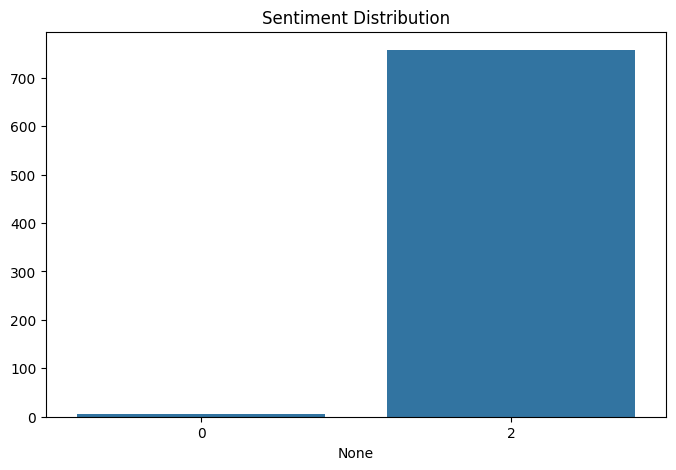

In [4]:
from Prediction import Prediction
from PreProcess import PreProcess
from ModelLoaderHelper import ModelLoader

metrics_folder = "metrics_folder"
preprocess = PreProcess()
#model_class = ModelLoader(f"{metrics_folder}/best_model.h5")
prediction_class = Prediction(model_class, preprocess, metrics_folder, 10)
sentiment_count, outcomes = prediction_class.predict("https://www.youtube.com/watch?v=HtcLqmwXicA&t=20s")

display(sentiment_count)
display(outcomes)